In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('GlobalVideoGameSales.csv')

In [ ]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

In [ ]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

Column: Year_of_Release
Skewness: -0.9731508298532475
Absolute Skewness:  0.9731508298532475
Distribution is left-skewed


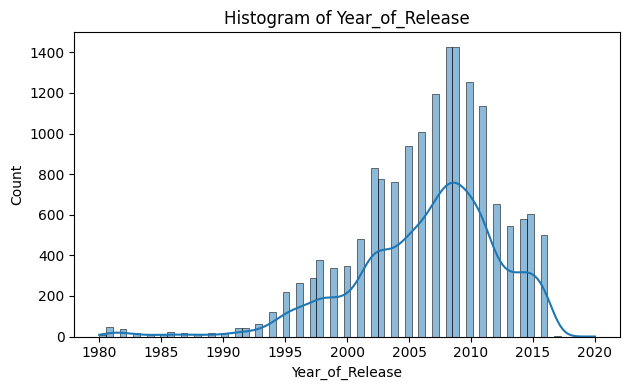


Column: NA_Sales
Skewness: 18.77379031272633
Absolute Skewness:  18.77379031272633
Distribution is right-skewed


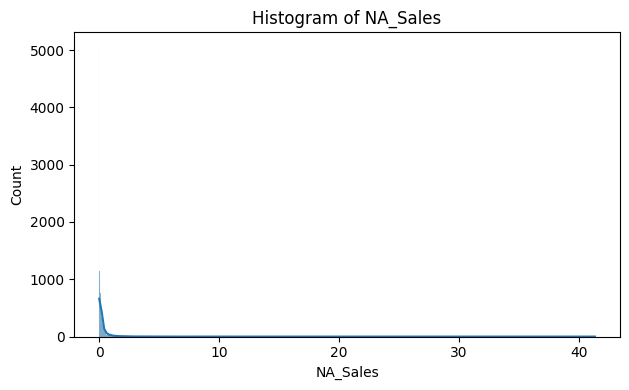


Column: EU_Sales
Skewness: 18.85293905608081
Absolute Skewness:  18.85293905608081
Distribution is right-skewed


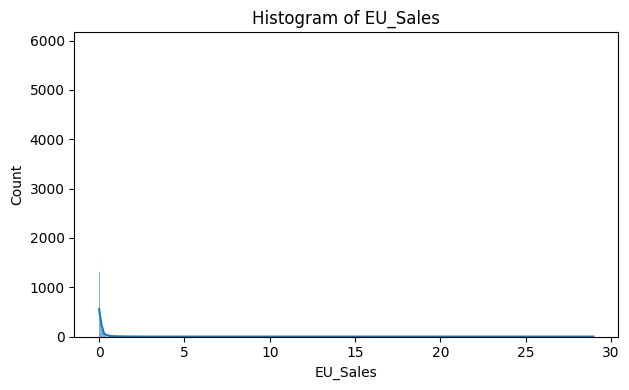


Column: JP_Sales
Skewness: 11.208769128232701
Absolute Skewness:  11.208769128232701
Distribution is right-skewed


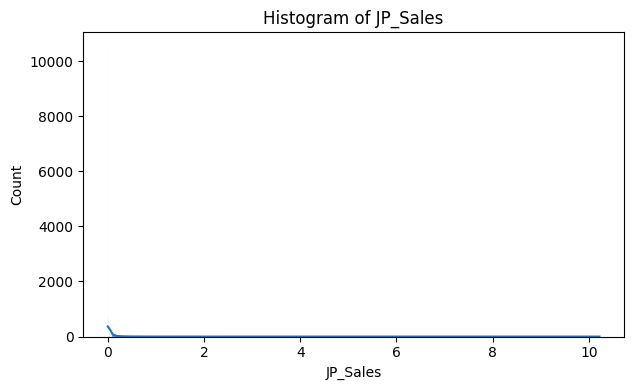


Column: Other_Sales
Skewness: 24.586282622292313
Absolute Skewness:  24.586282622292313
Distribution is right-skewed


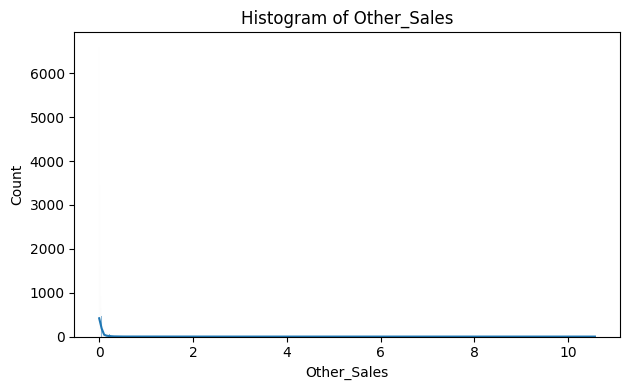


Column: Global_Sales
Skewness: 17.377989722323182
Absolute Skewness:  17.377989722323182
Distribution is right-skewed


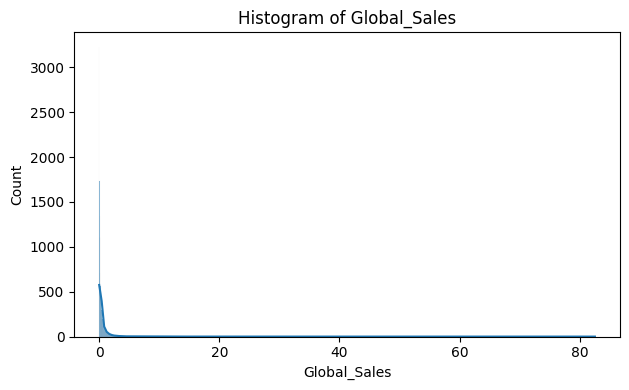


Column: Critic_Score
Skewness: -0.6136462286413598
Absolute Skewness:  0.6136462286413598
Distribution is left-skewed


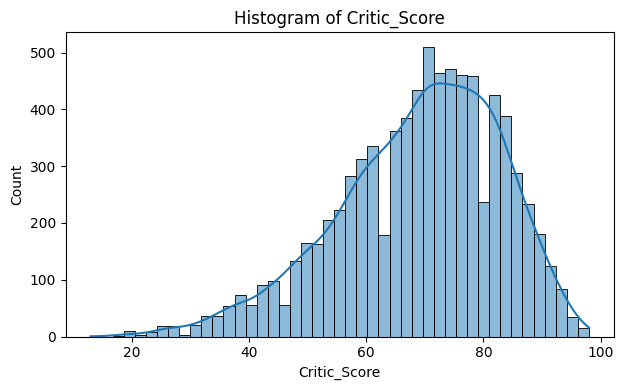


Column: Critic_Count
Skewness: 1.1551248654465518
Absolute Skewness:  1.1551248654465518
Distribution is right-skewed


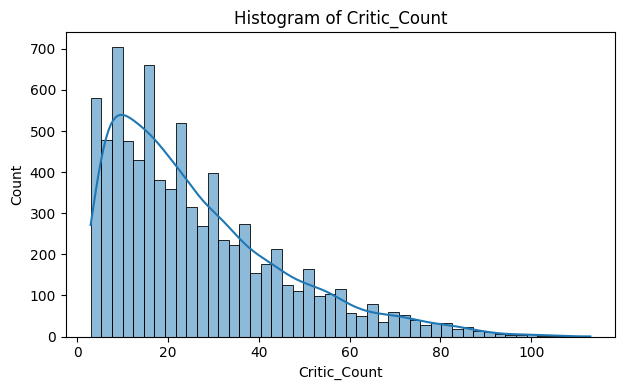


Column: User_Count
Skewness: 9.033248924876528
Absolute Skewness:  9.033248924876528
Distribution is right-skewed


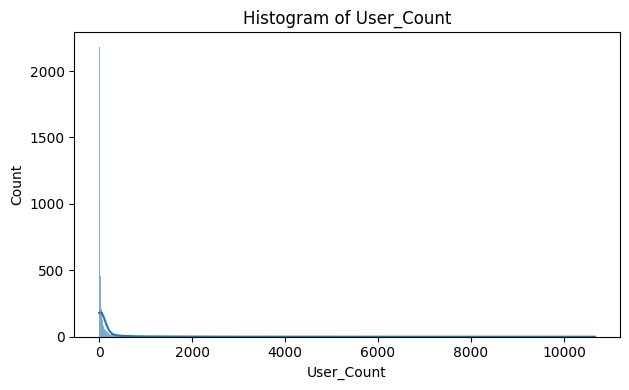

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

for x in numeric_columns:
  data = df[x].dropna()

  plt.figure(figsize=(12, 4))
  plt.subplot(1, 2, 1)
  sns.histplot(data, kde=True)
  plt.title(f'Histogram of ' + x)

  sk = data.skew()

  print(f"Column:", x)
  print(f"Skewness:", sk)
  print(f"Absolute Skewness: ", abs(sk))

  if abs(sk) < 0.5:
      print("Distribution is approximately symmetric (normal)")
  elif sk > 0.5:
      print("Distribution is right-skewed")
  elif sk < -0.5:
      print("Distribution is left-skewed")

  plt.tight_layout()
  plt.show()
  print()


##Data Pre-Processing
###1. Drop Duplicates

In [ ]:
print(df.shape)
df = df.drop_duplicates()
print(df.shape)

(16719, 16)
(16719, 16)


###2. Handle Missing Values

In [ ]:
fillWithNA = ["Name", "Year_of_Release", "Genre", "Publisher", "Developer", "Rating"]
fillWithMedian = ["Critic_Score", "Critic_Count", "User_Score", "User_Count"]

In [ ]:
for i in df.columns:
  if i in fillWithNA:
    df[i] = df[i].fillna("NA")

df.loc[df["User_Score"] == "tbd", "User_Score"] = "NaN"
df["User_Score"] = df["User_Score"].astype(float)

for i in df.columns:
  if i in fillWithMedian:
    df[i] = df[i].fillna(df[i].median())

In [ ]:
df["Year_of_Release"] = df["Year_of_Release"].astype("str")

###3. Handle Extreme Values

In [ ]:
def getOutliers(dataset,key):
    q1 = dataset[key].quantile(0.25);
    q3 = dataset[key].quantile(0.75);
    iqr = q3 - q1;
    max_ = q3 + (iqr * 1.5);
    min_ = q1 - (iqr * 1.5);
    dataset.loc[dataset[key] < min_,key] = min_;
    dataset.loc[dataset[key] > max_,key] = max_;

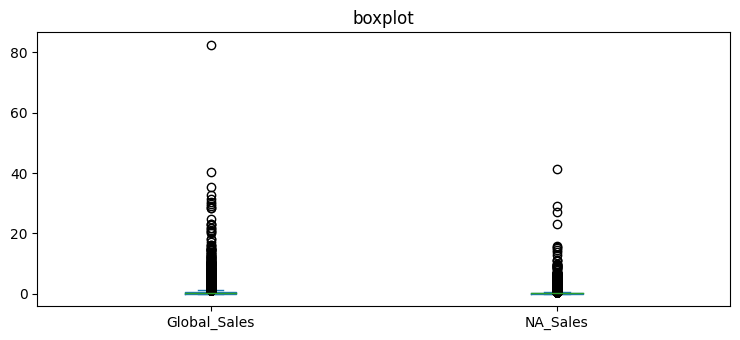

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

ax = df[['Global_Sales', 'NA_Sales']].plot(kind='box', title='boxplot')

plt.show()

In [ ]:
for i in df.columns:
  if df[i].dtypes != "object":
    getOutliers(df, i);

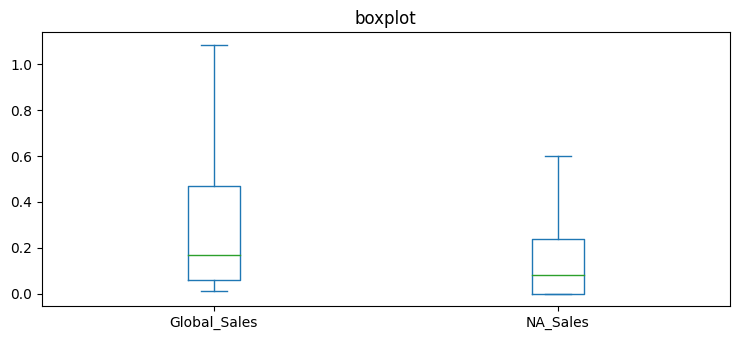

In [ ]:
ax = df[['Global_Sales', 'NA_Sales']].plot(kind='box', title='boxplot')

plt.show()

###4. Remove Duplicate and Unnecessary Columns

In [ ]:
df = df.drop(["Name"], axis=1)

###5. One Hot Encoding / Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

newdf = df
for i in newdf.columns:
  if df[i].dtypes == "object":
    encoder = LabelEncoder()
    newdf[i] = encoder.fit_transform(newdf[i])

<Axes: >

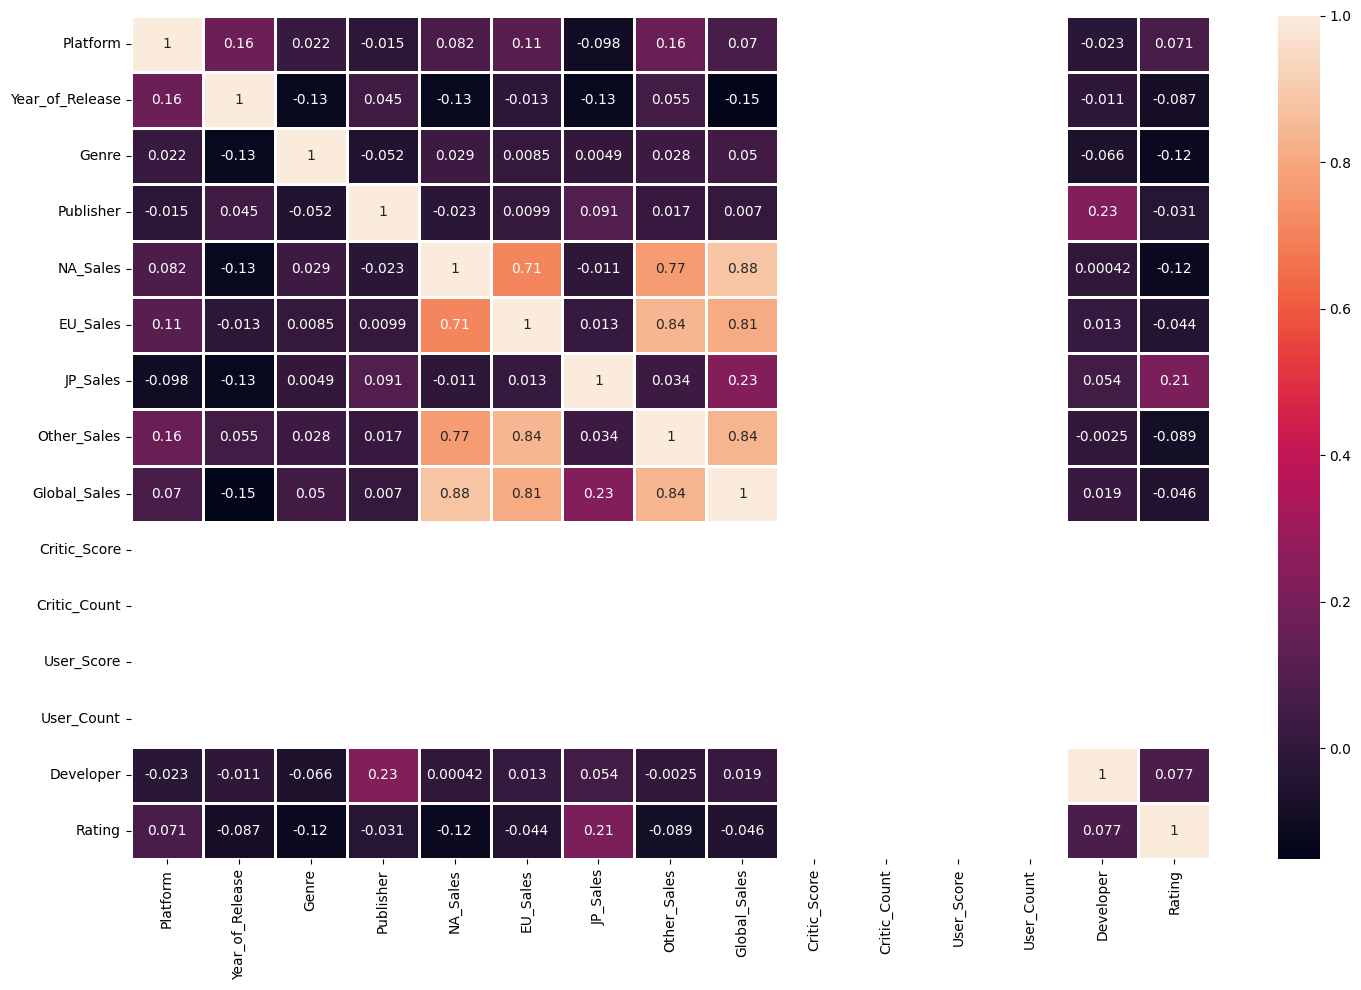

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(newdf.corr(), annot=True, linewidths=.8, ax=ax)

In [ ]:
newdf = newdf.drop(["Critic_Score", "Critic_Count", "User_Score", "User_Count"], axis=1)

<Axes: >

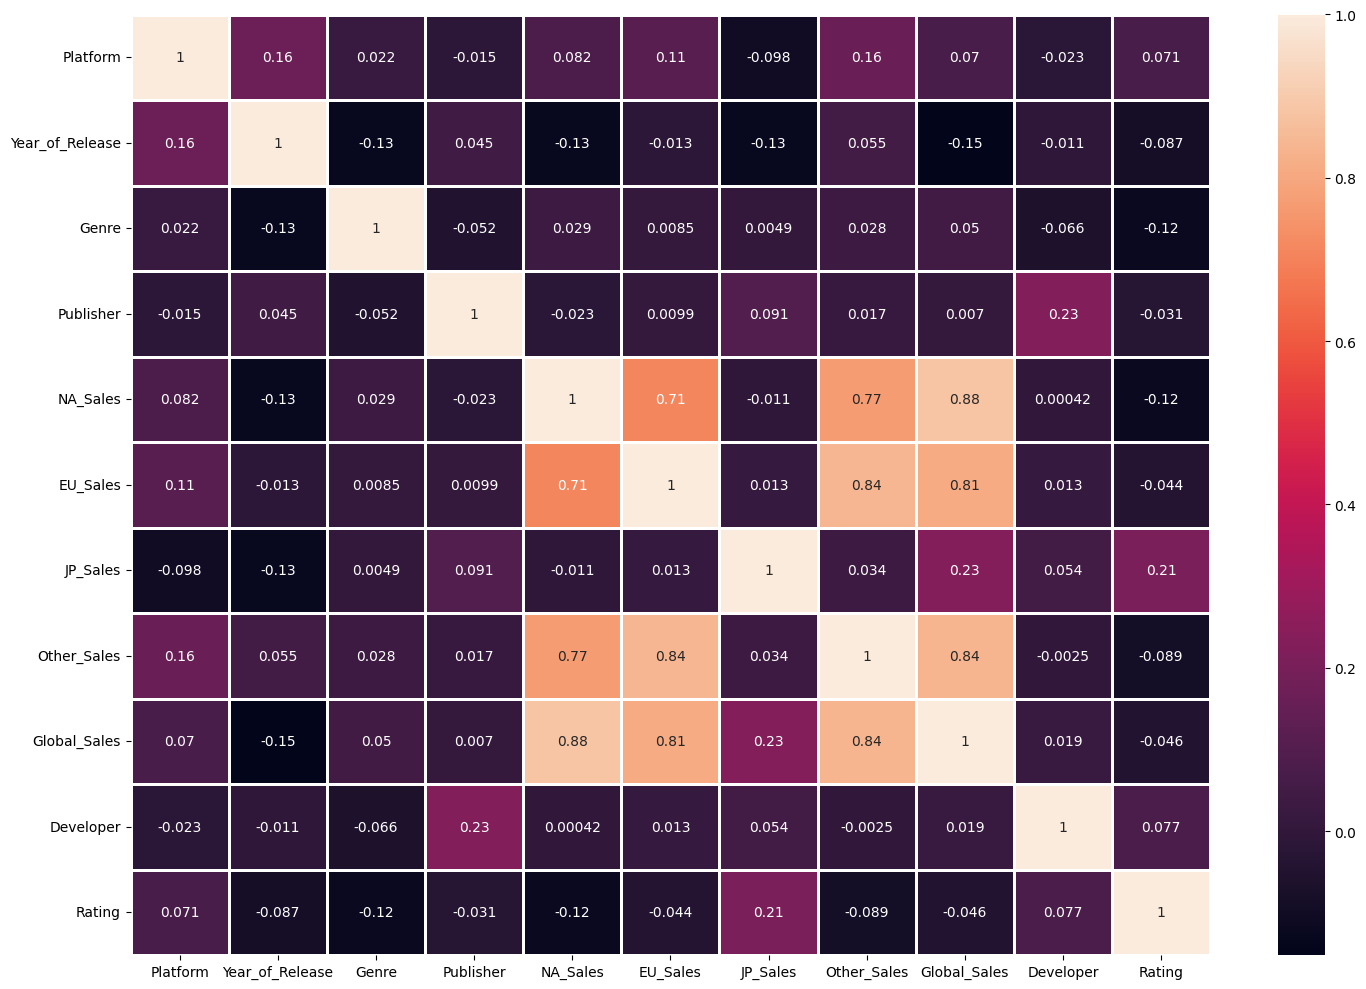

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(newdf.corr(), annot=True, linewidths=.8, ax=ax)

In [ ]:
corrdf = newdf.corr()
corrdf

,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Developer,Rating
Platform,1.000000,0.164814,0.021992,-0.014887,0.081625,0.109588,-0.097940,0.159107,0.069954,-0.022663,0.070877
Year_of_Release,0.164814,1.000000,-0.126825,0.044768,-0.127494,-0.013215,-0.128091,0.054837,-0.151903,-0.010563,-0.087173
Genre,0.021992,-0.126825,1.000000,-0.052038,0.028865,0.008469,0.004898,0.028095,0.049754,-0.065583,-0.120054
Publisher,-0.014887,0.044768,-0.052038,1.000000,-0.022801,0.009857,0.091373,0.016906,0.007004,0.226836,-0.031444
NA_Sales,0.081625,-0.127494,0.028865,-0.022801,1.000000,0.708834,-0.010942,0.768459,0.879027,0.000416,-0.118190
EU_Sales,0.109588,-0.013215,0.008469,0.009857,0.708834,1.000000,0.013422,0.838744,0.808631,0.013042,-0.043651
JP_Sales,-0.097940,-0.128091,0.004898,0.091373,-0.010942,0.013422,1.000000,0.033590,0.233551,0.053638,0.207889
Other_Sales,0.159107,0.054837,0.028095,0.016906,0.768459,0.838744,0.033590,1.000000,0.836578,-0.002537,-0.089077
Global_Sales,0.069954,-0.151903,0.049754,0.007004,0.879027,0.808631,0.233551,0.836578,1.000000,0.019107,-0.045535
Developer,-0.022663,-0.010563,-0.065583,0.226836,0.000416,0.013042,0.053638,-0.002537,0.019107,1.000000,0.077122


In [ ]:
dff = corrdf.unstack().reset_index();
dff.loc[(abs(dff[0]) >= .75) & (dff["level_0"] != dff["level_1"])]

,level_0,level_1,0
51,NA_Sales,Other_Sales,0.768459
52,NA_Sales,Global_Sales,0.879027
62,EU_Sales,Other_Sales,0.838744
63,EU_Sales,Global_Sales,0.808631
81,Other_Sales,NA_Sales,0.768459
82,Other_Sales,EU_Sales,0.838744
85,Other_Sales,Global_Sales,0.836578
92,Global_Sales,NA_Sales,0.879027
93,Global_Sales,EU_Sales,0.808631
95,Global_Sales,Other_Sales,0.836578


In [ ]:
df = df.drop(["EU_Sales", "Other_Sales"], axis=1)

##Since the target variable doesn't correlate with other columns if the outliers is removed, we decided to remove the outliers on the target variable as the result of our correlation analysis.

In [ ]:
corrdf = df.corr()
dff = corrdf.unstack().reset_index();
dff.loc[(abs(dff[0]) >= .75) & (dff["level_0"] != dff["level_1"])]

,level_0,level_1,0
58,NA_Sales,Global_Sales,0.879027
82,Global_Sales,NA_Sales,0.879027


##Data Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler

for i in newdf.columns:
    if i != "Global_Sales":
        scaler = StandardScaler();
        newdf[i] = scaler.fit_transform(newdf[i].values.reshape(-1, 1));

In [ ]:
newdf

,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Developer,Rating
0,1.212105,-0.114002,1.312270,0.368847,2.226530,2.118307,2.027783,1.995595,1.085,0.317015,-1.459955
1,-0.575894,-3.590899,-0.113691,0.368847,2.226530,2.118307,2.027783,1.995595,1.085,0.200037,0.499473
2,1.212105,0.217131,0.361629,0.368847,2.226530,2.118307,2.027783,1.995595,1.085,0.317015,-1.459955
3,1.212105,0.382697,1.312270,0.368847,2.226530,2.118307,2.027783,1.995595,1.085,0.317015,-1.459955
4,-1.291093,-1.769667,0.599289,0.368847,2.226530,2.118307,2.027783,1.995595,1.085,0.200037,0.499473
...,...,...,...,...,...,...,...,...,...,...,...
16714,0.139305,1.541663,-1.301992,1.163175,-0.814451,-0.741997,-0.360951,-0.804744,0.010,0.200037,0.499473
16715,1.450504,-0.114002,1.312270,-1.147090,-0.814451,-0.637986,-0.626366,-0.804744,0.010,0.200037,0.499473
16716,0.496905,1.541663,-1.064332,-0.352761,-0.814451,-0.741997,-0.360951,-0.804744,0.010,0.200037,0.499473
16717,-1.171894,-0.610702,-0.113691,1.420493,-0.763768,-0.741997,-0.626366,-0.804744,0.010,0.200037,0.499473


##Split Dataset

In [ ]:
X = newdf.drop(["Global_Sales"], axis=1);
y = newdf["Global_Sales"];

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.75)

##Fit dataset into a model

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

def evaluate_model(model):
    print("R2 score (TRAINING): ", r2_score(y_train,model.predict(X_train)));
    print("R2 score (TEST): ", r2_score(y_test,model.predict(X_test)));
    print("MSE: ", mean_squared_error(y_test,model.predict(X_test)));
    print("MAE: ", mean_absolute_error(y_test,model.predict(X_test)));
    print("RMSE: ", np.sqrt(mean_squared_error(y_test,model.predict(X_test))));

    from matplotlib import pyplot as plt

    plt.scatter(y_test,model.predict(X_test))
    plt.plot(model.predict(X_test),model.predict(X_test),color="red")


##Evaluate Models

R2 score (TRAINING):  0.9110292396021925
R2 score (TEST):  0.9061967643873424
MSE:  0.011608111101017454
MAE:  0.05767450379923881
RMSE:  0.10774094440377555


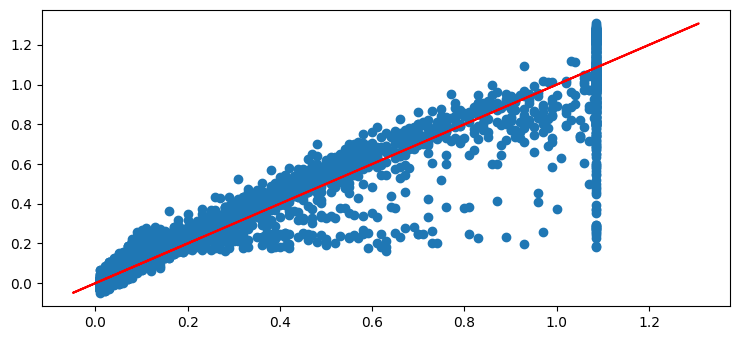

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression();
lr.fit(X_train,y_train);
evaluate_model(lr)

R2 score (TRAINING):  0.9110292367667309
R2 score (TEST):  0.9061967322862291
MSE:  0.011608115073516775
MAE:  0.05767605565713313
RMSE:  0.10774096283919489


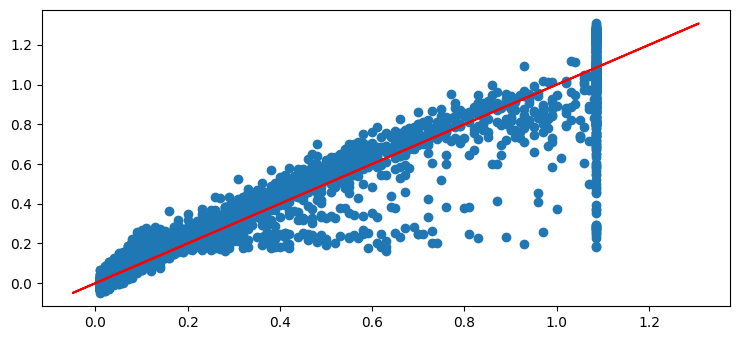

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge();
ridge.fit(X_train,y_train);
evaluate_model(ridge)

R2 score (TRAINING):  0.0
R2 score (TEST):  -5.2734890773065146e-05
MSE:  0.12375610689405678
MAE:  0.2840059321138145
RMSE:  0.35178986184092453


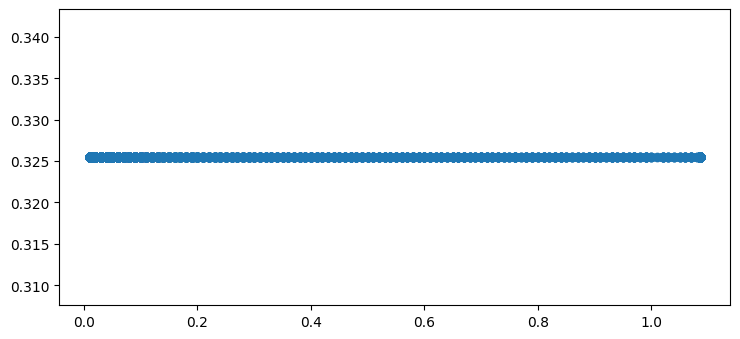

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso();
lasso.fit(X_train,y_train);
evaluate_model(lasso)

R2 score (TRAINING):  0.9308766024281918
R2 score (TEST):  0.9218656180336632
MSE:  0.009669097027951394
MAE:  0.05767454983685266
RMSE:  0.09833156679292461


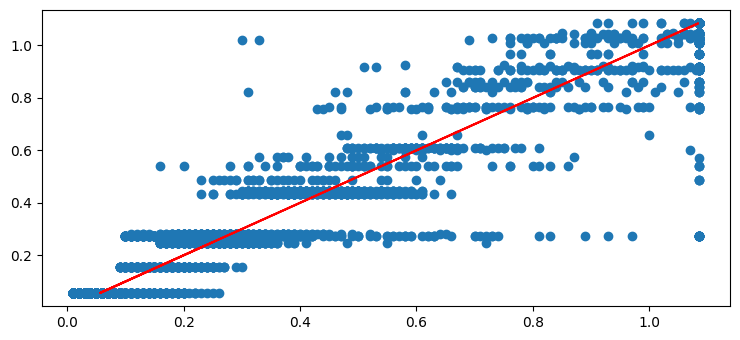

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(criterion="squared_error", max_depth=5)
dt.fit(X_train,y_train)
evaluate_model(dt)

R2 score (TRAINING):  0.9747076382792029
R2 score (TEST):  0.9522389610980654
MSE:  0.0059104085509696595
MAE:  0.03010207113911993
RMSE:  0.07687918151859878


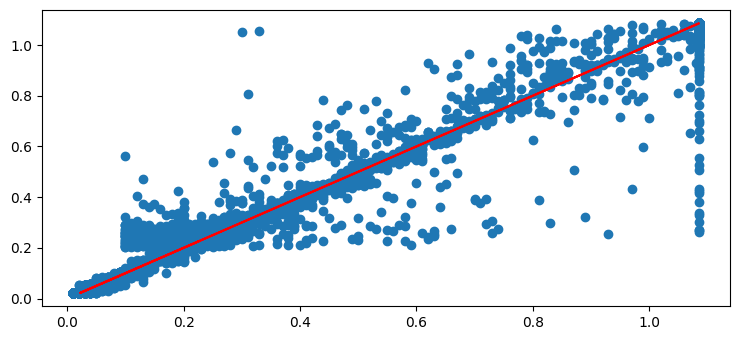

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(criterion="squared_error", n_estimators=100, max_depth=10)
rf.fit(X_train, y_train)
evaluate_model(rf)

#The best model for this dataset is Random Forest Regressor with criterion of squared error, 100 n_estimators and max depth of 10 with R2 score of 97%.

###Note: Outlier of target variable is removed as a result in correlation analysis